In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer

C:\Users\Alex\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\Alex\anaconda3\lib\site-packages\numpy\.libs\libopenblas.QVLO2T66WEPI7JZ63PS3HMOHFEY472BC.gfortran-win_amd64.dll
C:\Users\Alex\anaconda3\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
data = pd.read_csv("melb_data.csv")
data.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


### будем предсказывать переменную Prise

In [3]:
answer = data['Price']
data = data.drop(columns=['Price'])

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
X_train, X_test, y_train, y_test = train_test_split(data, answer, test_size=0.2)

 ###  train_test_split делит выборку так, чтобы по каждому признаку и целевой переменной распределения тренировочной части и тестовой части были одинаковы. Чтобы обучающая выборка была "такая же", как тестовая: содержала ту же долю мужчин/женщин и т.п.

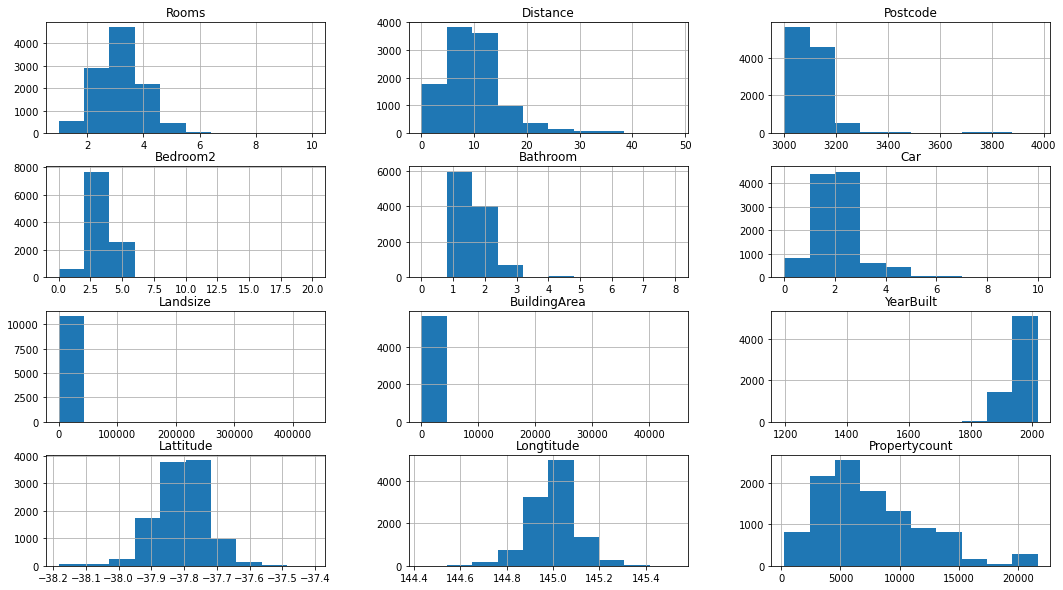

In [6]:
X_train.hist(figsize=(18, 10));

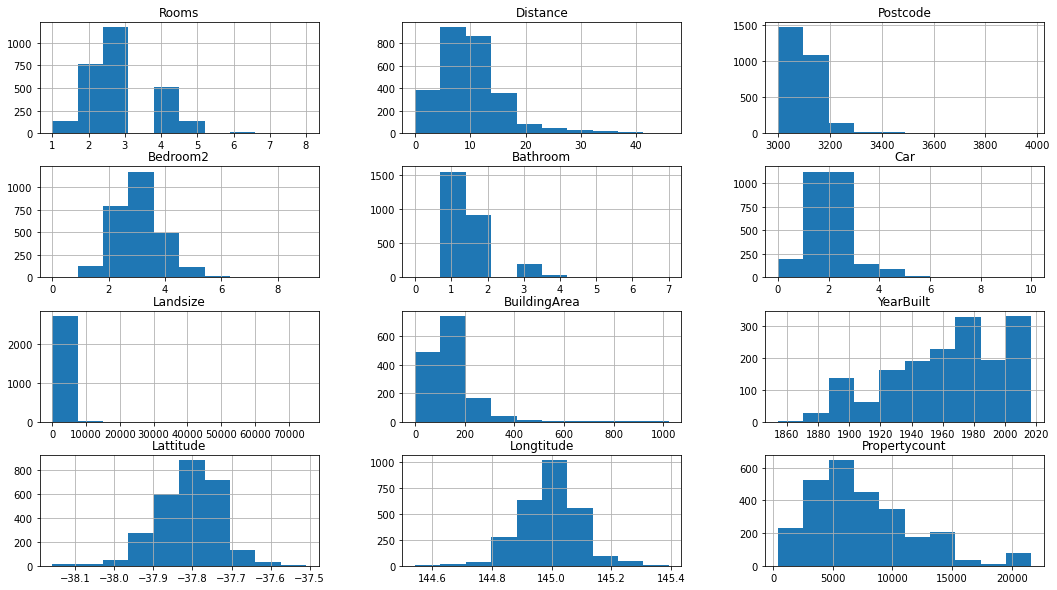

In [7]:
X_test.hist(figsize=(18, 10));

## предобработка признаков

In [8]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10864 entries, 6352 to 4633
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         10864 non-null  object 
 1   Address        10864 non-null  object 
 2   Rooms          10864 non-null  int64  
 3   Type           10864 non-null  object 
 4   Method         10864 non-null  object 
 5   SellerG        10864 non-null  object 
 6   Date           10864 non-null  object 
 7   Distance       10864 non-null  float64
 8   Postcode       10864 non-null  float64
 9   Bedroom2       10864 non-null  float64
 10  Bathroom       10864 non-null  float64
 11  Car            10816 non-null  float64
 12  Landsize       10864 non-null  float64
 13  BuildingArea   5662 non-null   float64
 14  YearBuilt      6535 non-null   float64
 15  CouncilArea    9765 non-null   object 
 16  Lattitude      10864 non-null  float64
 17  Longtitude     10864 non-null  float64
 18  Regi

### у числовых переменных пропуски чаще всего заполняются медианным значением по столбцу, а у категориальных переменных — самым часто встречающимся значением по столбцу.

Для числовых признаков берется медиана (median), а не среднее (mean), потому что медиана меньше подвержена выбросам.

In [9]:
# Car, BuildingArea и YearBuilt — числовые признаки, поэтому заполняем пропуски медианами по столбцам
X_train['Car'] = X_train['Car'].fillna(X_train['Car'].median())
X_train['BuildingArea'] = X_train['BuildingArea'].fillna(X_train['BuildingArea'].median())
X_train['YearBuilt'] = X_train['YearBuilt'].fillna(X_train['YearBuilt'].median())

<ipython-input-9-79f91c899ae6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['Car'] = X_train['Car'].fillna(X_train['Car'].median())
<ipython-input-9-79f91c899ae6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['BuildingArea'] = X_train['BuildingArea'].fillna(X_train['BuildingArea'].median())
<ipython-input-9-79f91c899ae6>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveat

CouncilArea — категориальный признак, поэтому заполним наны самым часто встречающимся значением по столбцу

In [10]:
most_frequent_value = X_train['CouncilArea'].value_counts()
most_frequent_value

Boroondara           949
Moreland             935
Moonee Valley        771
Darebin              723
Glen Eira            693
Stonnington          589
Maribyrnong          552
Yarra                516
Port Phillip         512
Banyule              475
Bayside              379
Melbourne            374
Brimbank             340
Hobsons Bay          332
Monash               280
Whitehorse           245
Manningham           240
Kingston             168
Whittlesea           136
Hume                 129
Wyndham               67
Maroondah             67
Knox                  66
Melton                56
Frankston             43
Greater Dandenong     42
Casey                 30
Nillumbik             25
Yarra Ranges          16
Cardinia               7
Macedon Ranges         6
Unavailable            1
Moorabool              1
Name: CouncilArea, dtype: int64

In [11]:
most_frequent_value = most_frequent_value.index[0] 

X_train['CouncilArea'] = X_train['CouncilArea'].fillna(most_frequent_value)

<ipython-input-11-27d7880e0df4>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['CouncilArea'] = X_train['CouncilArea'].fillna(most_frequent_value)


In [12]:
X_train.isna().any()

Suburb           False
Address          False
Rooms            False
Type             False
Method           False
SellerG          False
Date             False
Distance         False
Postcode         False
Bedroom2         False
Bathroom         False
Car              False
Landsize         False
BuildingArea     False
YearBuilt        False
CouncilArea      False
Lattitude        False
Longtitude       False
Regionname       False
Propertycount    False
dtype: bool

In [13]:
X_train.head()

,Suburb,Address,Rooms,Type,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
6352,Toorak,4/8 Bruce St,2,u,S,RT,6/08/2016,4.6,3142.0,2.0,2.0,2.0,0.0,109.0,1970.0,Stonnington,-37.83710,145.00660,Southern Metropolitan,7217.0
10202,Clayton,7 Jaguar Dr,4,h,S,Buxton,27/05/2017,16.7,3168.0,4.0,2.0,2.0,735.0,130.0,1970.0,Monash,-37.92374,145.13222,South-Eastern Metropolitan,5837.0
13102,Balwyn North,85 Clifton St,4,h,VB,hockingstuart,23/09/2017,9.7,3104.0,4.0,2.0,1.0,629.0,127.0,1970.0,Boroondara,-37.79241,145.10445,Southern Metropolitan,7809.0
12965,Eltham North,3 Michael Ct,6,h,S,Barry,19/08/2017,18.0,3095.0,6.0,3.0,4.0,966.0,332.0,1990.0,Boroondara,-37.68927,145.14910,Eastern Metropolitan,2346.0
223,Armadale,14/71 Denbigh Rd,3,u,S,Marshall,3/12/2016,6.3,3143.0,3.0,2.0,2.0,0.0,100.0,1998.0,Stonnington,-37.85520,145.01600,Southern Metropolitan,4836.0


## Обработка категориальных признаков

In [14]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10864 entries, 6352 to 4633
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         10864 non-null  object 
 1   Address        10864 non-null  object 
 2   Rooms          10864 non-null  int64  
 3   Type           10864 non-null  object 
 4   Method         10864 non-null  object 
 5   SellerG        10864 non-null  object 
 6   Date           10864 non-null  object 
 7   Distance       10864 non-null  float64
 8   Postcode       10864 non-null  float64
 9   Bedroom2       10864 non-null  float64
 10  Bathroom       10864 non-null  float64
 11  Car            10864 non-null  float64
 12  Landsize       10864 non-null  float64
 13  BuildingArea   10864 non-null  float64
 14  YearBuilt      10864 non-null  float64
 15  CouncilArea    10864 non-null  object 
 16  Lattitude      10864 non-null  float64
 17  Longtitude     10864 non-null  float64
 18  Regi

1 способ: замена значений в столбце на числа
Занумеровать уникальные значения в столбце и заменить каждое значение на его номер.

Пример: в столбце Suburb есть значения:

Reservoir            1
Richmond           2
Bentleigh East     3

Занумеровать значения в столбце можно двумя спосбами.

1 способ: Руками:

In [15]:
from collections import defaultdict
# создаем словарь {'Reservoir' : 1, 'Richmond' : 2, ...}
dict_ = defaultdict(int)
for i, x in enumerate(np.unique(X_train.Suburb)):
    dict_[x] = i+1

In [16]:
# к каждому значению в колонке Suburb применяем функцию, которая ставит этому значению в соответствие число из dict_
# про lambda-функции подробнее можно узнать тут: https://pythonru.com/osnovy/vse-chto-nuzhno-znat-o-lambda-funkcijah-v-python
X_train['Suburb'] = X_train['Suburb'].apply(lambda x: dict_[x])

<ipython-input-16-5a7612c1ad54>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['Suburb'] = X_train['Suburb'].apply(lambda x: dict_[x])


In [17]:
X_train.head()

,Suburb,Address,Rooms,Type,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
6352,283,4/8 Bruce St,2,u,S,RT,6/08/2016,4.6,3142.0,2.0,2.0,2.0,0.0,109.0,1970.0,Stonnington,-37.83710,145.00660,Southern Metropolitan,7217.0
10202,78,7 Jaguar Dr,4,h,S,Buxton,27/05/2017,16.7,3168.0,4.0,2.0,2.0,735.0,130.0,1970.0,Monash,-37.92374,145.13222,South-Eastern Metropolitan,5837.0
13102,23,85 Clifton St,4,h,VB,hockingstuart,23/09/2017,9.7,3104.0,4.0,2.0,1.0,629.0,127.0,1970.0,Boroondara,-37.79241,145.10445,Southern Metropolitan,7809.0
12965,114,3 Michael Ct,6,h,S,Barry,19/08/2017,18.0,3095.0,6.0,3.0,4.0,966.0,332.0,1990.0,Boroondara,-37.68927,145.14910,Eastern Metropolitan,2346.0
223,12,14/71 Denbigh Rd,3,u,S,Marshall,3/12/2016,6.3,3143.0,3.0,2.0,2.0,0.0,100.0,1998.0,Stonnington,-37.85520,145.01600,Southern Metropolitan,4836.0


2 способ, как можно перевести все значения в столбце в числа: использовать LabelEncoder из Sklearn

In [18]:
from sklearn.preprocessing import LabelEncoder

In [19]:
le = LabelEncoder()
le.fit(X_train['Method'])

LabelEncoder()

смотрим какие у нас были катигориальные значения

In [20]:
le.classes_

array(['PI', 'S', 'SA', 'SP', 'VB'], dtype=object)

трансформируем их в числовые значения

In [21]:
X_train['Method'] = le.transform(X_train['Method'])

<ipython-input-21-1ef3bbf48742>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['Method'] = le.transform(X_train['Method'])


In [22]:
X_train.head()

,Suburb,Address,Rooms,Type,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
6352,283,4/8 Bruce St,2,u,1,RT,6/08/2016,4.6,3142.0,2.0,2.0,2.0,0.0,109.0,1970.0,Stonnington,-37.83710,145.00660,Southern Metropolitan,7217.0
10202,78,7 Jaguar Dr,4,h,1,Buxton,27/05/2017,16.7,3168.0,4.0,2.0,2.0,735.0,130.0,1970.0,Monash,-37.92374,145.13222,South-Eastern Metropolitan,5837.0
13102,23,85 Clifton St,4,h,4,hockingstuart,23/09/2017,9.7,3104.0,4.0,2.0,1.0,629.0,127.0,1970.0,Boroondara,-37.79241,145.10445,Southern Metropolitan,7809.0
12965,114,3 Michael Ct,6,h,1,Barry,19/08/2017,18.0,3095.0,6.0,3.0,4.0,966.0,332.0,1990.0,Boroondara,-37.68927,145.14910,Eastern Metropolitan,2346.0
223,12,14/71 Denbigh Rd,3,u,1,Marshall,3/12/2016,6.3,3143.0,3.0,2.0,2.0,0.0,100.0,1998.0,Stonnington,-37.85520,145.01600,Southern Metropolitan,4836.0


2 способ: бинаризация
Второй способ обработать категориальные признаки — бинаризация. При бинаризации из одного столбца с несколькими категориальными значениями получается несколько новых бинарных столбцов, значения в которых — 0 и 1.

Пример: Пусть у нас в данных есть категориальный признак Education, и в нем три уникальных значения — 'high school', 'university' и 'PhD'. При бинаризации вместо колонки Education появится три новые колонки: Education_high_school, Education_university и Education_phd. В колонке Education_high_school будут единицы в тех строках, в которых в колонке Education было значение 'high school', а в остальных строках будут 0. Аналогично для двух других колонок.

In [23]:
np.unique(X_train['Regionname'])

array(['Eastern Metropolitan', 'Eastern Victoria',
       'Northern Metropolitan', 'Northern Victoria',
       'South-Eastern Metropolitan', 'Southern Metropolitan',
       'Western Metropolitan', 'Western Victoria'], dtype=object)

In [24]:
pd.get_dummies(X_train['Regionname'])

,Eastern Metropolitan,Eastern Victoria,Northern Metropolitan,Northern Victoria,South-Eastern Metropolitan,Southern Metropolitan,Western Metropolitan,Western Victoria
6352,0,0,0,0,0,1,0,0
10202,0,0,0,0,1,0,0,0
13102,0,0,0,0,0,1,0,0
12965,1,0,0,0,0,0,0,0
223,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...
8778,0,0,1,0,0,0,0,0
289,0,0,0,0,0,0,1,0
11629,0,0,1,0,0,0,0,0
3508,0,0,1,0,0,0,0,0


In [25]:
X_train = pd.get_dummies(X_train, columns=['Regionname'])

In [26]:
X_train.head()

,Suburb,Address,Rooms,Type,Method,SellerG,Date,Distance,Postcode,Bedroom2,...,Longtitude,Propertycount,Regionname_Eastern Metropolitan,Regionname_Eastern Victoria,Regionname_Northern Metropolitan,Regionname_Northern Victoria,Regionname_South-Eastern Metropolitan,Regionname_Southern Metropolitan,Regionname_Western Metropolitan,Regionname_Western Victoria
6352,283,4/8 Bruce St,2,u,1,RT,6/08/2016,4.6,3142.0,2.0,...,145.00660,7217.0,0,0,0,0,0,1,0,0
10202,78,7 Jaguar Dr,4,h,1,Buxton,27/05/2017,16.7,3168.0,4.0,...,145.13222,5837.0,0,0,0,0,1,0,0,0
13102,23,85 Clifton St,4,h,4,hockingstuart,23/09/2017,9.7,3104.0,4.0,...,145.10445,7809.0,0,0,0,0,0,1,0,0
12965,114,3 Michael Ct,6,h,1,Barry,19/08/2017,18.0,3095.0,6.0,...,145.14910,2346.0,1,0,0,0,0,0,0,0
223,12,14/71 Denbigh Rd,3,u,1,Marshall,3/12/2016,6.3,3143.0,3.0,...,145.01600,4836.0,0,0,0,0,0,1,0,0


Применим тот же подход к столбцу Type:

In [27]:
X_train = pd.get_dummies(X_train, columns=['Type'])

In [28]:
X_train.head()

,Suburb,Address,Rooms,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,...,Regionname_Eastern Victoria,Regionname_Northern Metropolitan,Regionname_Northern Victoria,Regionname_South-Eastern Metropolitan,Regionname_Southern Metropolitan,Regionname_Western Metropolitan,Regionname_Western Victoria,Type_h,Type_t,Type_u
6352,283,4/8 Bruce St,2,1,RT,6/08/2016,4.6,3142.0,2.0,2.0,...,0,0,0,0,1,0,0,0,0,1
10202,78,7 Jaguar Dr,4,1,Buxton,27/05/2017,16.7,3168.0,4.0,2.0,...,0,0,0,1,0,0,0,1,0,0
13102,23,85 Clifton St,4,4,hockingstuart,23/09/2017,9.7,3104.0,4.0,2.0,...,0,0,0,0,1,0,0,1,0,0
12965,114,3 Michael Ct,6,1,Barry,19/08/2017,18.0,3095.0,6.0,3.0,...,0,0,0,0,0,0,0,1,0,0
223,12,14/71 Denbigh Rd,3,1,Marshall,3/12/2016,6.3,3143.0,3.0,2.0,...,0,0,0,0,1,0,0,0,0,1


## Удаление признаков

Иногда признаки из датасета можно удалять. Это бывает нужно в двух случаях:

когда признак не несет никакой полезной информации. Примеры таких признаков: номер паспорта клиента (от номера паспорта не зависит, например, насколько надежным заемщиком является клиент), какой вид смузи предпочитает клиент и среднегодичная погода в городе, где живет человек/
когда признак может нести полезную информацию, но его сложно предобработать. И для создания базовой модели (бейзлайна) этот признак проще удалить. И после, в процессе улучшения предобработки признаков, можно будет добавить этот признак обратно. Пример такого признака: время, в которое клиент совершил покупку на сайте или признак Address из нашего датасета
Давайте удалим из нашего датасета признаки Address, Date и CouncilArea. Позже вы можете сами добавить информацию из этих признаков в датасет и попробовать обучить модель машинного обучения с ними.

In [29]:
X_train = X_train.drop(columns = ['Address', 'Date', 'CouncilArea', 'SellerG'])

In [30]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10864 entries, 6352 to 4633
Data columns (total 25 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Suburb                                 10864 non-null  int64  
 1   Rooms                                  10864 non-null  int64  
 2   Method                                 10864 non-null  int32  
 3   Distance                               10864 non-null  float64
 4   Postcode                               10864 non-null  float64
 5   Bedroom2                               10864 non-null  float64
 6   Bathroom                               10864 non-null  float64
 7   Car                                    10864 non-null  float64
 8   Landsize                               10864 non-null  float64
 9   BuildingArea                           10864 non-null  float64
 10  YearBuilt                              10864 non-null  float64
 11  

# Обучение моделей

## Линейная регрессия

In [31]:
from sklearn.linear_model import LinearRegression

In [32]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

## Случайный лес (регрессия)

In [33]:
from sklearn.ensemble import RandomForestRegressor

In [34]:
rf = RandomForestRegressor(n_estimators=100, max_depth=7)
rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=7)

# Подготовка тестовых данных точно так же как треин

In [35]:
X_test.head()

,Suburb,Address,Rooms,Type,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
701,Bentleigh,3/2 Scotts St,2,t,S,hockingstuart,3/12/2016,13.0,3204.0,2.0,1.0,1.0,140.0,250.0,1970.0,Glen Eira,-37.92040,145.04430,Southern Metropolitan,6795.0
2540,Fitzroy,60 Bell St,4,h,S,Nelson,22/05/2016,1.6,3065.0,3.0,2.0,1.0,132.0,165.0,1880.0,Yarra,-37.80040,144.97680,Northern Metropolitan,5825.0
9368,Werribee,7 Carbon Ct,3,h,SP,Triwest,3/06/2017,14.7,3030.0,3.0,2.0,1.0,805.0,NaN,NaN,Wyndham,-37.89568,144.65733,Western Metropolitan,16166.0
8512,Williamstown,10 Crofton Dr,5,h,S,Greg,13/05/2017,8.0,3016.0,5.0,3.0,2.0,531.0,288.0,1997.0,Hobsons Bay,-37.86290,144.87810,Western Metropolitan,6380.0
2972,Hadfield,4 Surrey St,4,h,S,Barry,3/12/2016,12.1,3046.0,4.0,3.0,5.0,591.0,268.0,2010.0,Moreland,-37.71270,144.94890,Northern Metropolitan,2606.0


In [36]:
X_test['Car'] = X_test['Car'].fillna(X_train['Car'].median())
X_test['BuildingArea'] = X_test['BuildingArea'].fillna(X_train['BuildingArea'].median())
X_test['YearBuilt'] = X_test['YearBuilt'].fillna(X_train['YearBuilt'].median())

# CouncilArea — категориальный признак, поэтому заполним наны самым часто встречающимся значением по столбцу

X_test['CouncilArea'] = X_test['CouncilArea'].fillna(most_frequent_value)

<ipython-input-36-1a8ef3b5bade>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['Car'] = X_test['Car'].fillna(X_train['Car'].median())
<ipython-input-36-1a8ef3b5bade>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['BuildingArea'] = X_test['BuildingArea'].fillna(X_train['BuildingArea'].median())
<ipython-input-36-1a8ef3b5bade>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats

In [37]:
X_test['Suburb'] = X_test['Suburb'].apply(lambda x: dict_[x])

<ipython-input-37-d6c6c5ccd4c9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['Suburb'] = X_test['Suburb'].apply(lambda x: dict_[x])


In [38]:
X_test['Method'] = le.transform(X_test['Method'])

<ipython-input-38-7e10218b6032>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['Method'] = le.transform(X_test['Method'])


In [39]:
X_test = pd.get_dummies(X_test, columns=['Regionname', 'Type'])

In [40]:
X_test = X_test.drop(columns = ['Address', 'Date', 'CouncilArea', 'SellerG'])

## Получение предсказаний на тестовом датасете

In [41]:
y_predicted_linreg = lr.predict(X_test)

In [42]:
y_predicted_linreg[:10]

array([ 847281.92459683, 1846707.80382662,  748776.35149871,
       1694758.01681916, 1436957.82296276,  273882.61940418,
       1562930.9643282 ,  738327.19017065,  821419.60908841,
       1534002.38788447])

In [43]:
np.array(y_test)[:10]

array([ 851000., 1620000.,  531000., 2040000.,  870000.,  435000.,
        883300.,  670000.,  617000., 1770000.])

In [44]:
y_predicted_rf = rf.predict(X_test)

In [45]:
y_predicted_rf[:10]

array([ 943253.96424073, 2041919.23308521,  796187.9662457 ,
       1689433.47334214,  962039.18494938,  467384.0368094 ,
       1043537.89214893,  957309.77179017, 1046930.88346393,
       1539460.70823715])

## Метрики качества

Эта задача — задача регрессии, поэтому мы будем вычислять метрики регрессии. Вычислим MSE и MAE. Средняя квадратичная ошибка и средняя абсолютная ошибка

In [46]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [47]:
mean_absolute_error(y_predicted_linreg, y_test)

259218.81133991774

In [48]:
mean_squared_error(y_predicted_linreg, y_test)

135197198647.92613

In [49]:
mean_absolute_error(y_predicted_rf, y_test)

188979.2455996726

In [50]:
mean_squared_error(y_predicted_rf, y_test)

79293790094.76637

In [53]:
X_train

,Suburb,Rooms,Method,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,...,Regionname_Eastern Victoria,Regionname_Northern Metropolitan,Regionname_Northern Victoria,Regionname_South-Eastern Metropolitan,Regionname_Southern Metropolitan,Regionname_Western Metropolitan,Regionname_Western Victoria,Type_h,Type_t,Type_u
6352,283,2,1,4.6,3142.0,2.0,2.0,2.0,0.0,109.0,...,0,0,0,0,1,0,0,0,0,1
10202,78,4,1,16.7,3168.0,4.0,2.0,2.0,735.0,130.0,...,0,0,0,1,0,0,0,1,0,0
13102,23,4,4,9.7,3104.0,4.0,2.0,1.0,629.0,127.0,...,0,0,0,0,1,0,0,1,0,0
12965,114,6,1,18.0,3095.0,6.0,3.0,4.0,966.0,332.0,...,0,0,0,0,0,0,0,1,0,0
223,12,3,1,6.3,3143.0,3.0,2.0,2.0,0.0,100.0,...,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8778,82,3,0,6.7,3058.0,3.0,2.0,2.0,296.0,127.0,...,0,1,0,0,0,0,0,1,0,0
289,13,3,1,5.9,3032.0,3.0,1.0,2.0,623.0,127.0,...,0,0,0,0,0,1,0,1,0,0
11629,80,2,2,3.6,3068.0,2.0,2.0,1.0,533.0,110.0,...,0,1,0,0,0,0,0,0,0,1
3508,170,3,1,4.2,3031.0,3.0,1.0,1.0,188.0,106.0,...,0,1,0,0,0,0,0,1,0,0


In [51]:
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler

In [58]:
scaler = RobustScaler()
# скэлируем только часть признаков датасета. Скэлировать можно только числовые признаки!!
scaler.fit(X_train.drop(['Method'], axis=1))

RobustScaler()

In [59]:
scaled_data = scaler.transform(X_train.drop(['Method'], axis=1))
scaled_data = pd.DataFrame(scaled_data, columns = X_train.drop(['Method'], axis=1).columns).head()

In [61]:
X_train.drop(['Method'], axis=1).head()

,Suburb,Rooms,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,...,Regionname_Eastern Victoria,Regionname_Northern Metropolitan,Regionname_Northern Victoria,Regionname_South-Eastern Metropolitan,Regionname_Southern Metropolitan,Regionname_Western Metropolitan,Regionname_Western Victoria,Type_h,Type_t,Type_u
6352,283,2,4.6,3142.0,2.0,2.0,2.0,0.0,109.0,1970.0,...,0,0,0,0,1,0,0,0,0,1
10202,78,4,16.7,3168.0,4.0,2.0,2.0,735.0,130.0,1970.0,...,0,0,0,1,0,0,0,1,0,0
13102,23,4,9.7,3104.0,4.0,2.0,1.0,629.0,127.0,1970.0,...,0,0,0,0,1,0,0,1,0,0
12965,114,6,18.0,3095.0,6.0,3.0,4.0,966.0,332.0,1990.0,...,0,0,0,0,0,0,0,1,0,0
223,12,3,6.3,3143.0,3.0,2.0,2.0,0.0,100.0,1998.0,...,0,0,0,0,1,0,0,0,0,1


In [62]:
scaled_data.head()

,Suburb,Rooms,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,...,Regionname_Eastern Victoria,Regionname_Northern Metropolitan,Regionname_Northern Victoria,Regionname_South-Eastern Metropolitan,Regionname_Southern Metropolitan,Regionname_Western Metropolitan,Regionname_Western Victoria,Type_h,Type_t,Type_u
0,0.785276,-0.8,-0.676471,0.563107,-1.0,1.0,0.0,-0.925829,-3.000000,0.000000,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,-1.0,0.0,1.0
1,-0.472393,0.8,1.102941,0.815534,1.0,1.0,0.0,0.620726,0.500000,0.000000,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.809816,0.8,0.073529,0.194175,1.0,1.0,-1.0,0.397685,0.000000,0.000000,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,-0.251534,2.4,1.294118,0.106796,3.0,2.0,2.0,1.106786,34.166667,1.333333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.877301,0.0,-0.426471,0.572816,0.0,1.0,0.0,-0.925829,-4.500000,1.866667,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,-1.0,0.0,1.0
